> # Star Constellation Indentifier
A Star Constellation is a set of star which when connected form a ***Unique Pattern*** in the nightsky.

---
</br>

There are total of 88 Constellations officially recognized till now but this project had considered only 5.
*   Big Dipper 
*   Cancer
*   Leo
*   Orion
*   Scorpio



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

# ***Loading the data from the Drive***

---


*   the **labels** list contains the folder names of each constellations
*   **get_data** function performs 3 functions

      1.   Load the Data from the Drive (The Drive needs to be mounted first on google collabs)
      2.   Resize the image with dimensions 256x256
      3.   Append the image with its label in the **data** list



In [4]:
labels = ["BigDipper","cancer","leo","Orion","Scorpio"]
img_size = 256

def get_data(data_dir):
  data = []
  for label in labels:
    path = os.path.join(data_dir, label)
    class_number = labels.index(label)
    for image in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, image))[...,::-1]
        resized_arr = cv2.resize(img_arr, (img_size,img_size))
        # print("Data:", [resize_arr,class_number])
        data.append([resized_arr,class_number])
      except Exception:
        pass
  # print(data)
  return np.array(data,dtype=object)

train = get_data("/content/drive/My Drive/Constellation/train")
val = get_data("/content/drive/My Drive/Constellation/test")
print("Data Loaded!")

Data Loaded!


# ***Ploting the Data Loaded with seaborn***


---



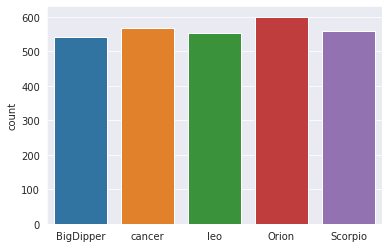

In [ ]:
l = []
# print(train)
for i in train:
  # print(i)
  if(i[1] == 0):
    l.append("BigDipper")
  if(i[1] == 1):
    l.append("cancer")
  if(i[1] == 2):
    l.append("leo")
  if(i[1] == 3):
    l.append("Orion")
  if(i[1] == 4):
    l.append("Scorpio")
    
sns.set_style('darkgrid')
# print(l)
sns.countplot(x=l)

# ***Normalizing Data***

---


Since the Data values may range alot it is necessary to Normalize it.

In [5]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)
print("Normalization Done!")

Normalization Done!


# ***Augmenting given data***

---


: Its a technique to create modified copy of an image by rotating, fliping, zooming, croping etc in order to increase the size of dataset.
***ImageDataGenerator*** is a class provided by keras to perfrom Data Augmentation 

In [30]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        #featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 60,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.4, # Randomly zoom image 
        width_shift_range=0.6,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.6,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True
      )  # randomly flip images


datagen.fit(x_train)
print("Data Augmentation has been performed!")

Data Augmentation has been performed!


# ***Creating a Model***

---


A Convolution Neural Network ([CNN](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)) is a Deep Learning Model which helps in classification of Image.

In [7]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0

# ***Training the Model***

---

**Optimizer** : An optimizer is a method or algorithm to update the various parameters that can reduce the loss in much less effort.
<br>
we have used **Adam** Optimizer.

In [10]:
# opt = Adam(learning_rate=0.000001)
model.compile(optimizer = 'adam' ,loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])
model.optimizer.learning_rate = 0.000001
history = model.fit(x_train,y_train,epochs = 1 , validation_data = (x_val, y_val))

20/20 [==============================] - 53s 3s/step - loss: 1.6089 - accuracy: 0.2829 - val_loss: 1.6133 - val_accuracy: 0.2222


# ***Ploting the accuracy of model***

---


We can plot a graph of model accuracy with training dataset and validation dataset in order to check how our model feets with forign data after training.
We can also similarly the graph for loss with traing and validation dataset.

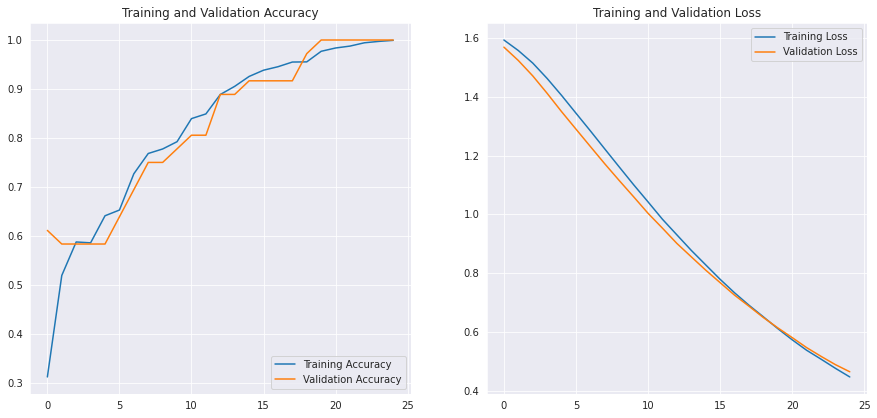

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# ***Predicting Constellation from an Image***

---




The Image:
/content/drive/My Drive/Constellation/test/cancer/ 4.jpg


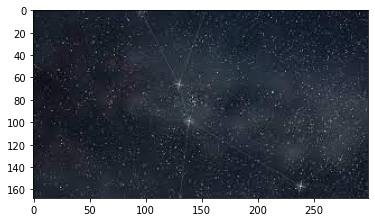

In [11]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

path = "/content/drive/My Drive/Constellation/test/cancer/"
test_image = "4.jpg"
img = path+test_image
plt.imshow(image.load_img(img))
print("\nThe Image:")
print(path,test_image)
img_arr = cv2.imread(os.path.join(path, test_image))[...,::-1]
test_image = cv2.resize(img_arr, (img_size,img_size))
test_image = np.expand_dims(test_image,axis=0)
test_image = preprocess_input(test_image)

BigDipper  :  22.32 %
cancer  :  20.23 %
leo  :  20.62 %
Orion  :  19.14 %
Scorpio  :  17.70 %

Predicted Constellation is:  BigDipper 



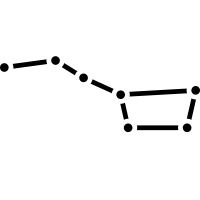

In [12]:
constellation_symbol = "/content/drive/My Drive/Constellation/icons/"
result = model.predict(test_image)
predicted_class = np.argmax(result)
for probs in result:
  for label,pred in zip(labels,probs):
    print(label," : ","%.2f %%"%(pred*100))
constellation_symbol = constellation_symbol+labels[predicted_class]+".png"
print("\nPredicted Constellation is: ",labels[predicted_class],"\n")
image.load_img(constellation_symbol)